# HSE 2019 ML (bachelors 3rd course)
## Homework #1
### Student: Igor Tukh

In [637]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from collections import defaultdict, deque
from tqdm import tqdm_notebook as tqdm
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve

In [244]:
DATASETS_DIR = 'datasets'
DATASETS = ['cancer.csv', 'spam.csv', 'blobs.csv']

In [245]:
def load_csv_dataset(dataset_path, label_name='label'):
    if label_name is not None:
        dataset = pd.read_csv(dataset_path)
        data_columns = np.array([name for name in dataset.columns if name != label_name])
        return dataset[label_name], dataset[data_columns]
    else:
        return pd.read_csv(dataset_path)

#### 1) (8 points) Implement the kNN algorithm and calculate Leave-one-out error on both datasets for 1 to 10 neighbors.


In [246]:
def get_k_nearest_indexes(from_point, to_points, k):
    dist_square = lambda x: np.linalg.norm(from_point - x)
    dists = np.array([dist_square(point) for point in to_points])
    return dists.argsort(kind='mergesort')[:k]

In [247]:
def kNN(point, points, points_labels, k, nearest_neighbors=None):
    affinities = defaultdict(lambda:0)
    nearest_neighbors = get_k_nearest_indexes(point, points, k) if nearest_neighbors is None else nearest_neighbors[:k]
    for neighbor_ind in nearest_neighbors:
        affinities[points_labels[neighbor_ind]] += 1
    result_label = None
    max_label_value = 0
    for label, value in affinities.items():
        if max_label_value < value:
            result_label = label
            max_label_value = value
    return result_label 

In [248]:
def get_LOO(dataset_path, max_k, scale=False):
    labels, data = load_csv_dataset(dataset_path)
    if scale:
        index = data.index
        columns = data.columns
        scaler = MinMaxScaler()
        data = pd.DataFrame(data = scaler.fit_transform(data), index=index, columns=columns)
    LOO = defaultdict(lambda:0)
    dataset_len = labels.shape[0]
    for ind in tqdm(range(dataset_len)):
        points_labels = pd.concat([labels[:ind], labels[ind+1:]]).to_numpy()
        points = pd.concat([data[:ind], data[ind+1:]]).to_numpy()
        point = data.iloc[ind].to_numpy()
        label = labels.iloc[ind]
        nearest_neighbors = get_k_nearest_indexes(point, points, max_k)
        for k in reversed(range(1, max_k + 1)):
            kNN_label = kNN(point, points, points_labels, k, nearest_neighbors)
            if kNN_label != label:
                LOO[k] += 1
    for k in range(1, max_k + 1):
        LOO[k] = 1.0 * LOO[k] / dataset_len
        print('dataset {}: k = {}, LOO = {}'.format(dataset_path, k, 1.0 * LOO[k]))
    return LOO

In [249]:
results = []

In [250]:
for dataset in DATASETS[:2]:
    results.append((dataset, get_LOO(os.path.join(DATASETS_DIR, dataset), 10)))

dataset datasets/cancer.csv: k = 1, LOO = 0.0843585237258348
dataset datasets/cancer.csv: k = 2, LOO = 0.0843585237258348
dataset datasets/cancer.csv: k = 3, LOO = 0.07381370826010544
dataset datasets/cancer.csv: k = 4, LOO = 0.07381370826010544
dataset datasets/cancer.csv: k = 5, LOO = 0.06678383128295255
dataset datasets/cancer.csv: k = 6, LOO = 0.070298769771529
dataset datasets/cancer.csv: k = 7, LOO = 0.06854130052724078
dataset datasets/cancer.csv: k = 8, LOO = 0.06854130052724078
dataset datasets/cancer.csv: k = 9, LOO = 0.06678383128295255
dataset datasets/cancer.csv: k = 10, LOO = 0.06854130052724078


dataset datasets/spam.csv: k = 1, LOO = 0.16952836339926103
dataset datasets/spam.csv: k = 2, LOO = 0.16952836339926103
dataset datasets/spam.csv: k = 3, LOO = 0.18517713540534667
dataset datasets/spam.csv: k = 4, LOO = 0.17344055640078243
dataset datasets/spam.csv: k = 5, LOO = 0.1858291675722669
dataset datasets/spam.csv: k = 6, LOO = 0.1767007172353836
dataset datasets/spam.csv: k = 7, LOO = 0.1958269941317105
dataset datasets/spam.csv: k = 8, LOO = 0.18235166268202566
dataset datasets/spam.csv: k = 9, LOO = 0.202782003912193
dataset datasets/spam.csv: k = 10, LOO = 0.18713323190610737


#### 2) (2 points) Scale all features with MinMax scaler to [0,1] and calculate Leave-one-out error on both datasets for 1 to 10 neighbors.

The task statementd doesn't say that we have to implement MinMaxScaler, so I'll use one from `sklearn`

In [10]:
for dataset in DATASETS[:2]:
    results.append((dataset, get_LOO(os.path.join(DATASETS_DIR, dataset), 10, scale=True)))


dataset datasets/cancer.csv: k = 1, LOO = 0.04745166959578207
dataset datasets/cancer.csv: k = 2, LOO = 0.04745166959578207
dataset datasets/cancer.csv: k = 3, LOO = 0.029876977152899824
dataset datasets/cancer.csv: k = 4, LOO = 0.028119507908611598
dataset datasets/cancer.csv: k = 5, LOO = 0.033391915641476276
dataset datasets/cancer.csv: k = 6, LOO = 0.03163444639718805
dataset datasets/cancer.csv: k = 7, LOO = 0.029876977152899824
dataset datasets/cancer.csv: k = 8, LOO = 0.029876977152899824
dataset datasets/cancer.csv: k = 9, LOO = 0.029876977152899824
dataset datasets/cancer.csv: k = 10, LOO = 0.026362038664323375


/Users/itukh/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)



dataset datasets/spam.csv: k = 1, LOO = 0.08758965442295154
dataset datasets/spam.csv: k = 2, LOO = 0.08758965442295154
dataset datasets/spam.csv: k = 3, LOO = 0.09476200825907412
dataset datasets/spam.csv: k = 4, LOO = 0.08911106281243208
dataset datasets/spam.csv: k = 5, LOO = 0.09519669637035427
dataset datasets/spam.csv: k = 6, LOO = 0.08911106281243208
dataset datasets/spam.csv: k = 7, LOO = 0.09932623342751576
dataset datasets/spam.csv: k = 8, LOO = 0.09063247120191263
dataset datasets/spam.csv: k = 9, LOO = 0.1019343620951967
dataset datasets/spam.csv: k = 10, LOO = 0.0969354488154749


And finally, let's see plots

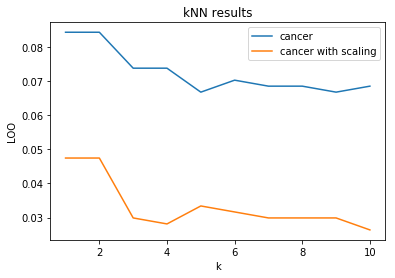

In [12]:
plt.clf()
plt.xlabel('k')
plt.ylabel('LOO')
plt.title('kNN results')
ks = list(range(1, 11))
plt.plot(ks, [results[0][1][k] for k in ks], label = 'cancer')
plt.plot(ks, [results[2][1][k] for k in ks], label = 'cancer with scaling')
plt.legend()
plt.show()

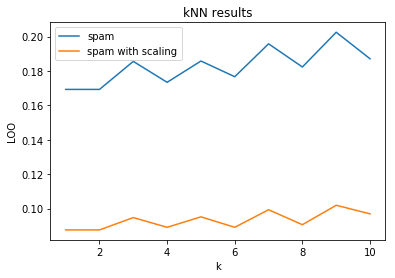

In [13]:
plt.clf()
plt.xlabel('k')
plt.ylabel('LOO')
plt.title('kNN results')
ks = list(range(1, 11))
plt.plot(ks, [results[1][1][k] for k in ks], label = 'spam')
plt.plot(ks, [results[3][1][k] for k in ks], label = 'spam with scaling')
plt.legend()
plt.show()

#### 3) (2) Implement the k-means algorithm and cluster data point into [2,3,4,5] clusters.

I will reuse function `get_k_nearest_indexes` from the previous task

Let's describe function to visualize out clustering. **It will be based on** the source of similar `sklearn` visualization.

In [224]:
def find_closest_point(point, points):
    return get_k_nearest_indexes(point, points, 1)[0]

In [225]:
def draw_clasters(centers, points, k):
    h = .02
    x_min, x_max = points[:, 0].min() - 1, points[:, 0].max() + 1
    y_min, y_max = points[:, 1].min() - 1, points[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = np.array([find_closest_point(point, centers) for point in np.c_[xx.ravel(), yy.ravel()]]).reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')

    plt.plot(points[:, 0], points[:, 1], 'k.', markersize=2)
    # Plot the centroids as a white X
    centroids = centers
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=169, linewidths=3,
                color='w', zorder=10)
    plt.title('K-means clustering, k = {}'.format(k))
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

In [226]:
def get_init_k_means_centers(points, k):
    return points[np.random.choice(range(points.shape[0]), k, replace=False)]

In [541]:
def get_k_means_new_centers(centers, points):
    k = centers.shape[0]
    points_centers = np.array([find_closest_point(point, centers) for point in points]).reshape(points.shape[0])
    return np.array([np.mean(points[np.where(points_centers == ind),:].reshape(-1, points.shape[1]), axis=0) for ind in range(k)])

In [542]:
def k_means(points, k):
    centers = get_init_k_means_centers(points, k)
    new_centers = get_k_means_new_centers(centers, points)
    while not np.allclose(centers, new_centers):
        centers = new_centers
        new_centers = get_k_means_new_centers(centers, points)
    return new_centers

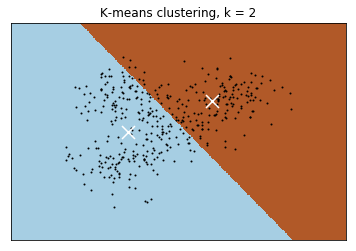

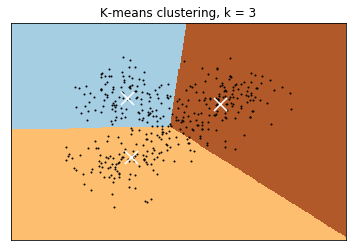

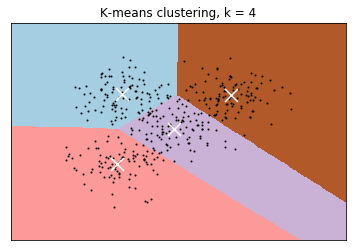

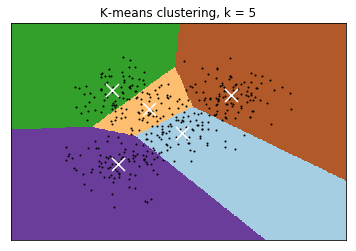

In [229]:
dataset_path = os.path.join(DATASETS_DIR, DATASETS[2])
points = load_csv_dataset(dataset_path, label_name=None).to_numpy()
for k in [2, 3, 4, 5]:
    centers = k_means(points, k)
    draw_clasters(centers, points, k)

#### 4) (2) Implement the DBSCAN algorithm and find parameters for clustering into [2,3,4,5] clusters.

At firts, let's describe function which splits points to clasters using DBSCAN

In our case, we have small enough dataset so we can use dfs instead of bfs without troubles with a stack

For visualization, we will also use a source of `sklearn` DBSCAN visualization.

In [321]:
def draw_clasters_DBSCAN(labels, core_samples, points):
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    core_samples_mask = np.zeros((labels.shape[0]), dtype=bool)
    core_samples_mask[core_samples] = True
    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        xy = points[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14)

        xy = points[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)

    if -1 in unique_labels:
        unique_labels.remove(-1)
    clasters_amount = len(unique_labels)
    plt.title('DBSCAN, %d clasters' % clasters_amount)
    plt.show()

In [333]:
def apply_DBSCAN(points, m, eps):
    n = points.shape[0]
    visited = np.zeros((n), dtype=bool)
    dist = lambda x, y: np.linalg.norm(x - y)
    dists = np.array([[dist(x, y) for y in points] for x in points])
    edges_mask = np.where(dists < eps, True, False)
    edges = [np.nonzero(edges_mask[ind])[0].reshape(-1) for ind in range(n)]
    
    def _dfs(current_point_ind):
        visited[current_point_ind] = True
        clusters[-1].append(current_point_ind)
        if (edges[current_point_ind].shape[0] < m):
            return
        
        for next_ind in edges[current_point_ind]:
            if not visited[next_ind]:
                _dfs(next_ind)
    
    clusters = []
    core_samples = [ind for ind in range(n) if len(edges[ind]) >= m]
    for ind in core_samples:
        if not visited[ind]:
            clusters.append([])
            _dfs(ind)
    
    labels = np.full((n), -1)
    for ind, cluster in enumerate(clusters):
        labels[cluster] = ind
    return np.array(labels), core_samples, len(clusters)

Let's find arguments for clustering in 2, 3, 4 and 5 clusters

In [355]:
clasterization = defaultdict(lambda:[])

dataset_path = os.path.join(DATASETS_DIR, DATASETS[2])
points = load_csv_dataset(dataset_path, label_name=None).to_numpy()

for m in tqdm(range(1, 20)):
    for eps in np.arange(0, 1, 0.05):
        labels, clusters, clasters_num = apply_DBSCAN(points, m, eps)
        clasterization[clasters_num].append((labels, clusters))

After it, I **manually** selected 'the best' clusterization (in my opinion)

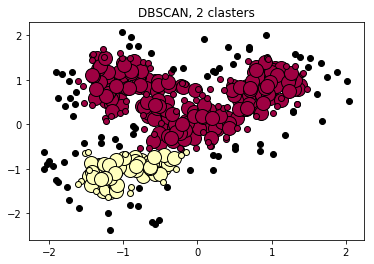

In [368]:
draw_clasters_DBSCAN(*clasterization[2][7], points)

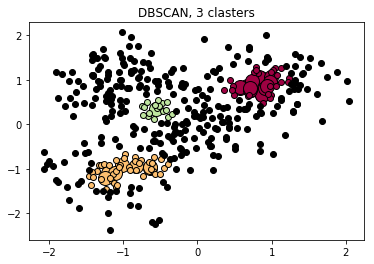

In [363]:
draw_clasters_DBSCAN(*clasterization[3][-1], points)

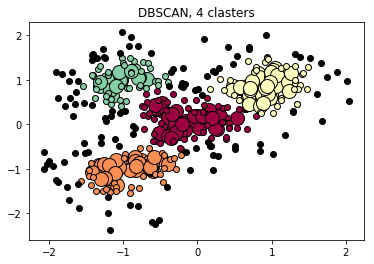

In [365]:
draw_clasters_DBSCAN(*clasterization[4][8], points)

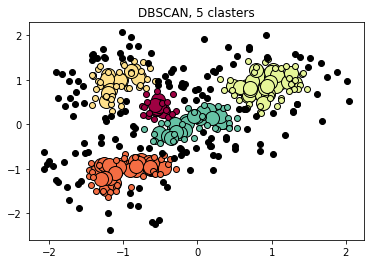

In [361]:
draw_clasters_DBSCAN(*clasterization[5][5], points)

#### 5) (3) Implement the Agglomerative Clustering and output the clustering into [2,3,4,5] clusters.

We will aim to minimize maximum distance between points in clusters (i.e. **maximum** strategy)

At first, let's modify visualization function a little bit (still it is based on the `sklearn` version)

In [372]:
def draw_clasters_agglomerative_clustering(labels, points):
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    
    for k, col in zip(unique_labels, colors):
        class_member_mask = (labels == k)

        xy = points[class_member_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)

    plt.title('Agglomerative Clustering, %d clasters' % len(unique_labels))
    plt.show()

In [508]:
def update_dists_matrix(dists, first_ind, second_ind):
    """
    Some `numpy` magic
    """
    if first_ind > second_ind:
        first_ind, second_ind = second_ind, first_ind
    first_dists = dists[first_ind].copy()
    second_dists = dists[second_ind].copy()
    first_dists = np.delete(first_dists, [first_ind, second_ind], axis=0)
    second_dists = np.delete(second_dists, [first_ind, second_ind], axis=0)
    new_dists = np.maximum(first_dists, second_dists).reshape(-1, 1)
    dists = np.delete(dists, [first_ind, second_ind], axis=0)
    dists = np.delete(dists, [first_ind, second_ind], axis=1)
    dists = np.hstack((dists, new_dists.copy()))
    new_dists.reshape(-1)
    new_dists = np.append(new_dists, np.array([dists[0][0]]))
    dists = np.vstack((dists, new_dists.copy()))
    return dists
    

def apply_agglomerative_clustering(points, k):
    n = points.shape[0]
    labels = np.arange(n)
    row_label = labels.copy()
    dists = np.array([[np.linalg.norm(x - y) for y in points] for x in points])
    max_dist = np.max(dists, axis=None)+1
    for ind in range(n):
        dists[ind][ind] = max_dist
    current_label = n
    for ind in range(n - k):
        first, second = np.unravel_index(np.argmin(dists, axis=None), dists.shape)
        labels[np.where(labels == row_label[first])] = current_label
        labels[np.where(labels == row_label[second])] = current_label
        row_label = np.delete(row_label, [first, second])
        row_label = np.append(row_label, np.array([current_label]))
        current_label += 1
        dists = update_dists_matrix(dists, first, second)
    return labels

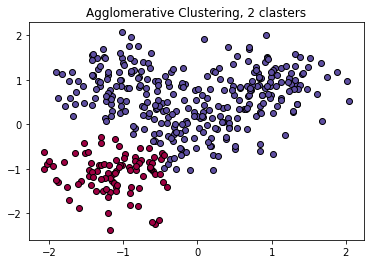

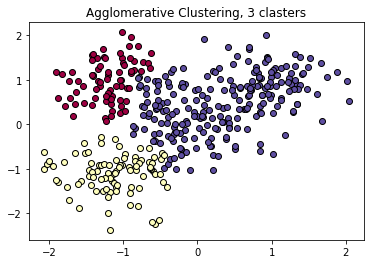

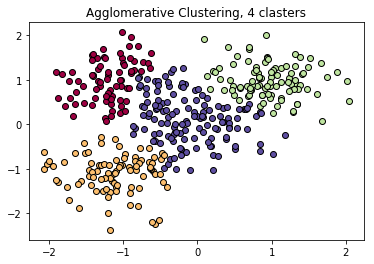

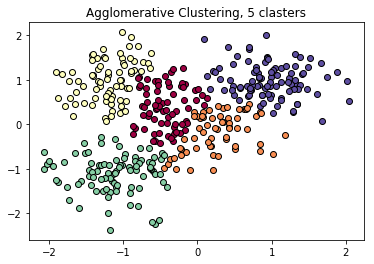

In [509]:
dataset_path = os.path.join(DATASETS_DIR, DATASETS[2])
points = load_csv_dataset(dataset_path, label_name=None).to_numpy()

for k in [2, 3, 4, 5]:
    draw_clasters_agglomerative_clustering(apply_agglomerative_clustering(points, k), points)

#### 6) (2) Cluster datapoints into [2,3,5,10] clusters with k-Means and calculate the Purity metric.

In [557]:
dataset_path = os.path.join(DATASETS_DIR, DATASETS[0])
labels, points = load_csv_dataset(dataset_path)
points = points.to_numpy()
labels = labels.to_numpy()
n = points.shape[0]
for k in [2, 3, 5, 10]:
    centers = k_means(points, k)
    claster_labels = np.zeros((points.shape[0]), dtype=np.int64)
    for ind, point in enumerate(points):
        claster_labels[ind] = get_k_nearest_indexes(point, centers, 1)[0]
    frequencies = [{} for _ in range(k)]
    for ind in range(k):
        for label in set(labels):
            frequencies[ind][label] = 0
    for ind, label in enumerate(claster_labels):
        frequencies[label][labels[ind]] += 1
    purity = 1.0 * sum([max(frequencies[ind].values()) for ind in range(k)]) / n
    print('cancer: k-means and {} clusters, purity = {}'.format(k, purity))

cancer: k-means and 2 clusters, purity = 0.8541300527240774
cancer: k-means and 3 clusters, purity = 0.8875219683655536
cancer: k-means and 5 clusters, purity = 0.8910369068541301
cancer: k-means and 10 clusters, purity = 0.9103690685413005


#### 7) (2) Calculate ROC-AUC for threshold rules for every feature for both datasets. Draw ROC curves for the best three in both.

Let's use a standard `sklearn` function.

In [630]:
def get_rocs(labels, points, pos_label):
    rocs = []
    for feature in points.columns:
        scores = points[feature].to_numpy()
        fpr, tpr, thresholds = roc_curve(labels, scores, pos_label=pos_label)
        auc = np.trapz(x=fpr, y=tpr)
        rocs.append((auc, fpr, tpr, feature))
    rocs.sort(key=lambda val: val[0], reverse=True)
    return rocs

In [635]:
def plot_roc(rocs, dataset):
    plt.clf()
    for auc, fpr, tpr, feature in rocs:
        plt.plot(fpr, tpr, label='feature {}, AUC = {}'.format(feature, auc))
    plt.title('AUC of dataset {}'.format(dataset))
    plt.legend()
    plt.show()

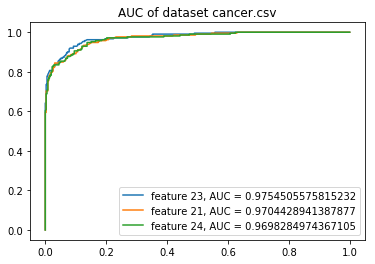

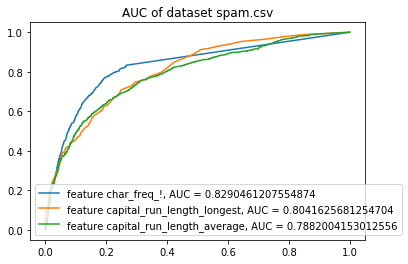

In [636]:
for dataset, pos_label in zip(DATASETS[:2], ['M', 1]):
    dataset_path = os.path.join(DATASETS_DIR, dataset)
    labels, points = load_csv_dataset(dataset_path)
    plot_roc(get_rocs(labels, points, pos_label)[:3], dataset)

#### 8) (1) Split the dataset into training and validation datasets (80%/20%). Print out the proportions of classes in all datasets.


In [581]:
def train_validation_random_split(points, labels, train_percent):
    permutation = np.random.permutation(points.shape[0])
    points = points[permutation]
    labels = labels[permutation]
    split_positon = int(train_percent * points.shape[0])
    return points[:split_positon], labels[:split_positon], points[split_positon:], labels[split_positon:]

In [584]:
for dataset in DATASETS[:2]:
    dataset_path = os.path.join(DATASETS_DIR, dataset)
    labels, points = load_csv_dataset(dataset_path)
    labels = labels.to_numpy()
    points = points.to_numpy()
    train_points, train_labels, validation_points, validation_labels = train_validation_random_split(
        points, labels, 0.8)
    unique_labels = list(set(labels))
    train_len = train_points.shape[0]
    val_len = validation_labels.shape[0]
    train_proportions = [1.0 * train_labels[np.where(train_labels == label)].shape[0] / train_len 
                         for label in unique_labels]
    validation_proportions = [1.0 * validation_labels[np.where(validation_labels == label)].shape[0] / val_len 
                         for label in unique_labels]
    proportions_strs = ['{}: {}'.format(label, proportion) 
                        for label, proportion in zip(unique_labels, train_proportions)]
    val_proportions_strs = ['{}: {}'.format(label, proportion) 
                            for label, proportion in zip(unique_labels, validation_proportions)]
    print('Dataset {}{}Train proportions {}'.format(dataset, os.linesep, ', '.join(proportions_strs)))
    print('Validation proportions {}'.format(', '.join(val_proportions_strs)))
    print()

Dataset cancer.csv
Train proportions B: 0.6197802197802198, M: 0.3802197802197802
Validation proportions B: 0.6578947368421053, M: 0.34210526315789475

Dataset spam.csv
Train proportions 0: 0.6046195652173914, 1: 0.3953804347826087
Validation proportions 0: 0.6112920738327905, 1: 0.38870792616720956



#### 9) (5) Implement a tree algorithm with Gini Impurity criterion. Find the best depth (from 1 to 10) on the validation dataset. Draw ROC curves for thresholds on class probabilities.

Our binary tree will be represented as an object Node (like in treap).

In [736]:
class GiniNode(object):
    def __init__(self, depth, points, labels, samples_amount):
        self.depth = depth
        self.samples_amount = samples_amount
        self.node_samples_amount = points.shape[0]
        self.points = points
        self.labels = labels
        self.left = None
        self.right = None
        self.feature = None
        self.threshold = None
    
    def split(self):
        best_ig = 0
        best_feature = None
        best_threshold = None
        
        for feature in tqdm(self.points.columns):
            for threshold in set(self.points[feature]):
                left_mask = self.points.index[self.points[feature] < threshold].tolist()
                right_mask = self.points.index[self.points[feature] >= threshold].tolist()
                ig = self._get_gini_impurity() * self.node_samples_amount / self.samples_amount
                impurity_left = GiniNode.get_gini_impurity(self.labels[left_mask].to_list())     
                impurity_right = GiniNode.get_gini_impurity(self.labels[right_mask].to_list())
                ig -= (1.0 * len(left_mask) * impurity_left + 1.0 * len(right_mask) * impurity_right) / self.samples_amount
                
                if ig > best_ig:
                    best_ig = ig
                    best_feature = feature
                    best_threshold = threshold
        
        if best_feature is None:
            return None, None
        
        self.feature = best_feature
        self.threshold = best_threshold
        left_mask = self.points.index[self.points[feature] < threshold].tolist()
        right_mask = self.points.index[self.points[feature] >= threshold].tolist()
        self.left = GiniNode(self.depth + 1, self.points.loc[left_mask, :], self.labels[left_mask], self.samples_amount)
        self.right = GiniNode(self.depth + 1, self.points.loc[right_mask, :], self.labels[right_mask], self.samples_amount)
    
        return self.left, self.right
     
    @staticmethod
    def get_gini_impurity(labels):
        frequencies = defaultdict(lambda: 0)
        for label in labels:
            frequencies[label] += 1
        values = list(frequencies.values())
        n = len(labels)
        return sum([(1 - 1.0 * value / n) * value / n for value in values])
    
    def _get_gini_impurity(self):
        return GiniNode.get_gini_impurity(list(labels))
    
def get_possitive_percent(node, possitive_label):
    labels_list = node.labels.to_list()
    if len(labels_list) == 0:
        return 0
    return 1.0 * np.count_nonzero(np.array(labels_list) == possitive_label) / len(labels_list)

def get_next_node(node, point):
    if node.left is None:
        return None
    if point[node.feature] < node.threshold:
        return node.left
    else:
        return node.right
    
class GiniDecisionTree(object):
    def __init__(self, points, labels, max_depth):
        self.root = GiniNode(0, points, labels, points.shape[0])
        nodes_to_process = deque()
        nodes_to_process.append(self.root)
        while len(nodes_to_process) > 0:
            cur_node = nodes_to_process.popleft()
            if cur_node.depth == max_depth:
                continue
            left, right = cur_node.split()
            if left is None:
                continue
            nodes_to_process.append(left)
            nodes_to_process.append(right)
            
def find_leaf(tree, features, depth):
    cur_node = tree.root
    while cur_node.depth < depth:
        next_node = get_next_node(cur_node, features)
        if next_node is None:
            return cur_node
        cur_node = next_node
    return cur_node

def is_possitive(tree, features, threshold, possitive_label, depth):
    leaf = find_leaf(tree, features, depth)
    return get_possitive_percent(leaf, possitive_label) >= threshold

In [696]:
def train_validation_random_split_dataframe(points, labels, train_percent):
    permutation = np.random.permutation(points.shape[0])
    points = points.reindex(permutation)
    labels = labels[permutation]
    split_positon = int(train_percent * points.shape[0])
    return points[:split_positon], labels[:split_positon], points[split_positon:], labels[split_positon:]

In [697]:
trees = []
train_and_val = []

for dataset in DATASETS[:2]:
    dataset_path = os.path.join(DATASETS_DIR, dataset)
    labels, points = load_csv_dataset(dataset_path)
    train_points, train_labels, validation_points, validation_labels = train_validation_random_split_dataframe(
        points, labels, 0.8)
    train_and_val.append((train_points, train_labels, validation_points, validation_labels))
    trees.append(GiniDecisionTree(train_points, train_labels, 10))

Let's look at the best accuracies for different depths (maybe depths are not indicative, but we will look at roc later)

Results below are for the cancer and spam datasets respectively.

In [741]:
for points, pos_label, tree in zip(train_and_val, ['M', 1], trees):
    train_points, train_labels, validation_points, validation_labels = points
    for depth in range(1, 11):
        max_accuracy = 0
        max_threshold = 0
        for threshold in np.arange(0, 1, 0.01):
            accuracy = 0
            for ind in validation_points.index:
                point = validation_points.loc[ind]
                possitive = is_possitive(tree, point, threshold, pos_label, depth)
                if (possitive and validation_labels[ind] == pos_label) or (not possitive and validation_labels[ind] != pos_label):
                    accuracy += 1
            if accuracy > max_accuracy:
                max_accuracy = accuracy
                max_threshold = threshold
        print('Depth {}, the best accuracy {} (threshold {})'.format(depth, max_accuracy / validation_points.shape[0], max_threshold)) 

Depth 1, the best accuracy 0.8596491228070176 (threshold 0.32)
Depth 2, the best accuracy 0.868421052631579 (threshold 0.61)
Depth 3, the best accuracy 0.868421052631579 (threshold 0.51)
Depth 4, the best accuracy 0.8596491228070176 (threshold 0.31)
Depth 5, the best accuracy 0.868421052631579 (threshold 0.32)
Depth 6, the best accuracy 0.868421052631579 (threshold 0.46)
Depth 7, the best accuracy 0.868421052631579 (threshold 0.27)
Depth 8, the best accuracy 0.868421052631579 (threshold 0.51)
Depth 9, the best accuracy 0.868421052631579 (threshold 0.01)
Depth 10, the best accuracy 0.868421052631579 (threshold 0.01)
Depth 1, the best accuracy 0.7947882736156352 (threshold 0.39)
Depth 2, the best accuracy 0.6221498371335505 (threshold 0.39)
Depth 3, the best accuracy 0.6221498371335505 (threshold 0.39)
Depth 4, the best accuracy 0.6221498371335505 (threshold 0.39)
Depth 5, the best accuracy 0.6221498371335505 (threshold 0.39)
Depth 6, the best accuracy 0.6221498371335505 (threshold 0.39)

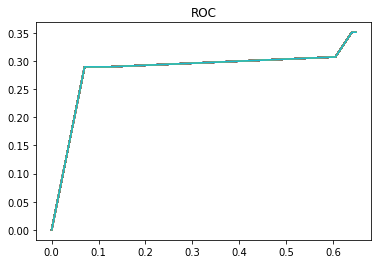

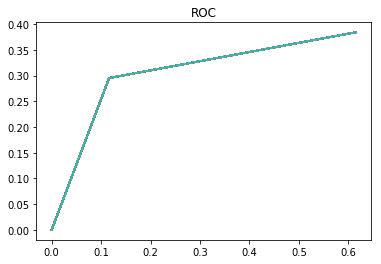

In [747]:
def plot_roc_tree(rocs):
    plt.clf()
    fprs = [fpr for fpr, _ in rocs]
    tprs = [tpr for _, tpr in rocs]
    for fpr, tpr in rocs:
        plt.plot(fprs, tprs)
    plt.title('ROC')
    plt.show()

best_d = [5, 1]

for points, pos_label, tree, depth in zip(train_and_val, ['M', 1], trees, best_d):
    train_points, train_labels, validation_points, validation_labels = points
    roc = []
    for threshold in np.arange(0, 1, 0.01):
        cur_fpr = 0
        cur_tpr = 0
        accuracy = 0
        for ind in validation_points.index:
            point = validation_points.loc[ind]
            possitive = is_possitive(tree, point, threshold, pos_label, depth)
            if possitive and validation_labels[ind] != pos_label:
                cur_fpr += 1
            if possitive and validation_labels[ind] == pos_label:
                cur_tpr += 1
        roc.append((1.0 * cur_fpr / validation_points.shape[0], 1.0 * cur_tpr / validation_points.shape[0]))
    roc.sort(key=lambda val: val[0])
    plot_roc_tree(roc)